In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


**reads the training data from a CSV file into a pandas DataFrame named train_df.**

In [2]:
train_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
train_df.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [3]:
train_df.dtypes

ID                    int64
RecipeNumber          int64
RecipeCode            int64
RecipeName           object
CommentID            object
UserID               object
UserName             object
UserReputation        int64
CreationTimestamp     int64
ReplyCount            int64
ThumbsUpCount         int64
ThumbsDownCount       int64
Rating                int64
BestScore             int64
Recipe_Review        object
dtype: object

**This line creates a new DataFrame train_default by dropping columns 'RecipeName', 'UserID', 'CommentID', and 'UserName' from the train_df DataFrame**

In [4]:
train_default = train_df.drop(columns=['RecipeName','UserID','CommentID','UserName'])
train_default.head()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


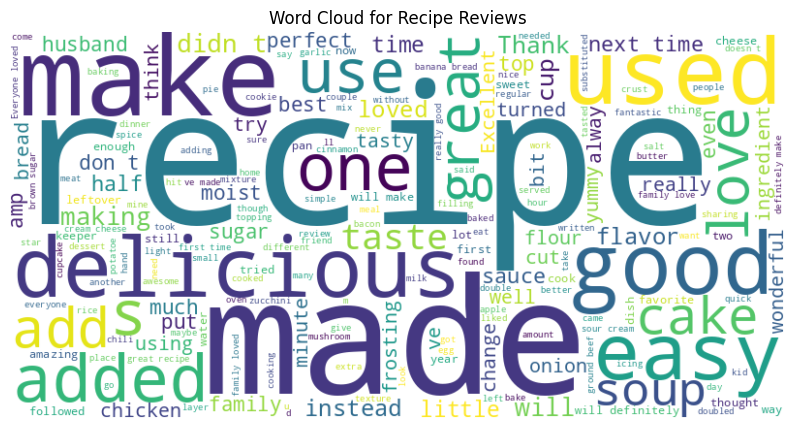

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data
train_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')

# Word Cloud for Recipe Reviews
reviews_text = ' '.join(train_df['Recipe_Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Recipe Reviews')
plt.axis('off')
plt.show()

**These lines print summary statistics of the train_df DataFrame.**

/tmp/ipykernel_18/1648809609.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


Summary Statistics:
                 ID  RecipeNumber     RecipeCode  UserReputation  \
count  13636.000000  13636.000000   13636.000000    13636.000000   
mean     121.085289     38.624377   21785.990833        2.160311   
std      116.995633     29.672351   23883.189918       10.086424   
min        0.000000      1.000000     386.000000        0.000000   
25%       45.000000     12.000000    6504.000000        1.000000   
50%       91.000000     33.000000   14600.000000        1.000000   
75%      148.000000     63.000000   33121.000000        1.000000   
max      724.000000    100.000000  191775.000000      510.000000   

       CreationTimestamp    ReplyCount  ThumbsUpCount  ThumbsDownCount  \
count       1.363600e+04  13636.000000   13636.000000     13636.000000   
mean        1.623713e+09      0.014520       1.098269         0.543708   
std         5.444020e+06      0.137323       4.166487         3.265660   
min         1.613035e+09      0.000000       0.000000         0.000000 

/tmp/ipykernel_18/1648809609.py:15: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


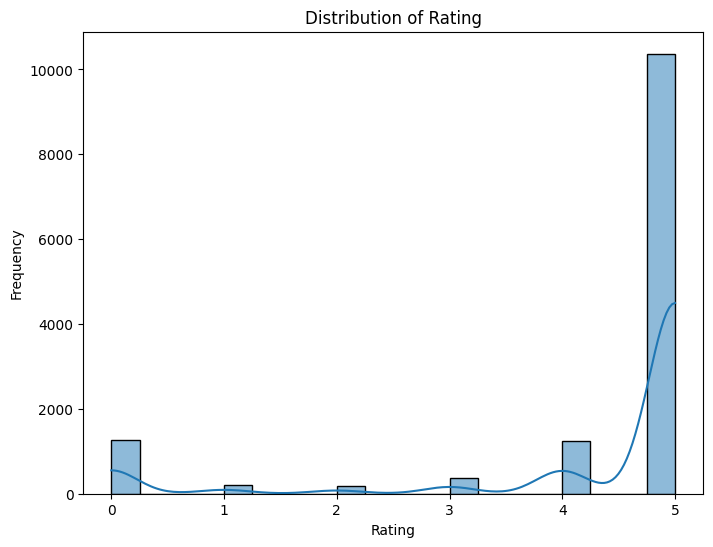

In [6]:
# Set use_inf_as_na option to True for Pandas (deprecated)
pd.set_option('mode.use_inf_as_na', True)

import matplotlib.pyplot as plt
import seaborn as sns

# EDA (Exploratory Data Analysis)
print("Summary Statistics:")
print(train_df.describe())
# This code plots a histogram showing the distribution of ratings in the training data.
# Distribution of Rating
plt.figure(figsize=(8, 6))

# Convert infinity values to NaN before plotting
with pd.option_context('mode.use_inf_as_na', True):
    sns.histplot(train_df['Rating'], bins=20, kde=True)

plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**This code generates a heatmap showing the correlation matrix of numeric columns in the train_default DataFrame.**

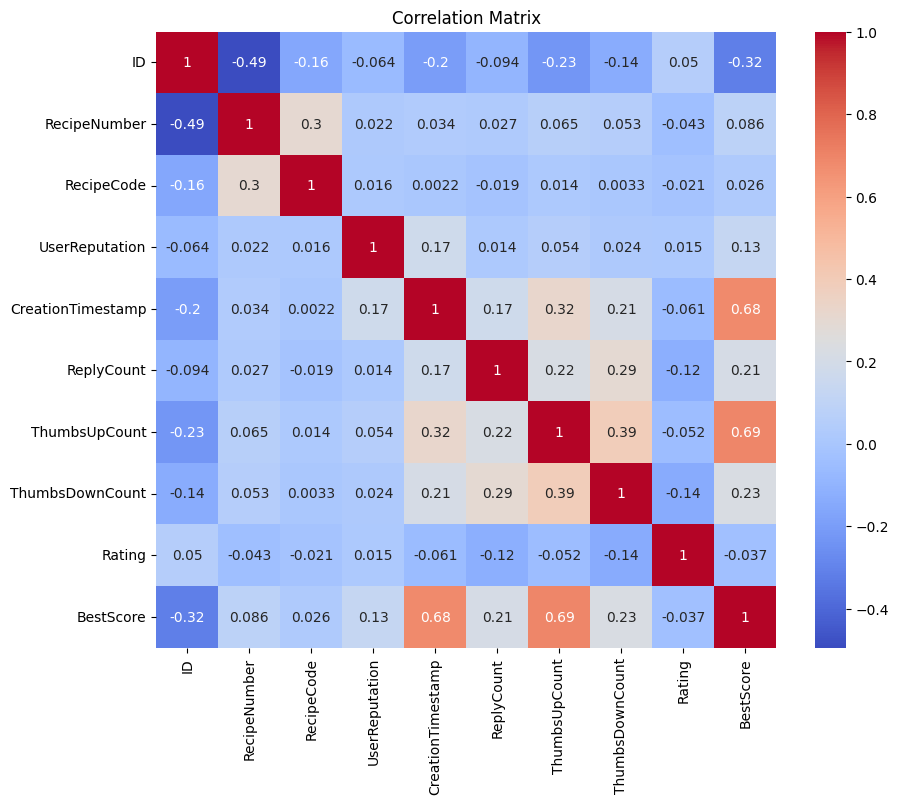

In [7]:
# Load the training data
train_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')

# Remove non-numeric columns
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_numeric = train_df[numeric_columns]

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


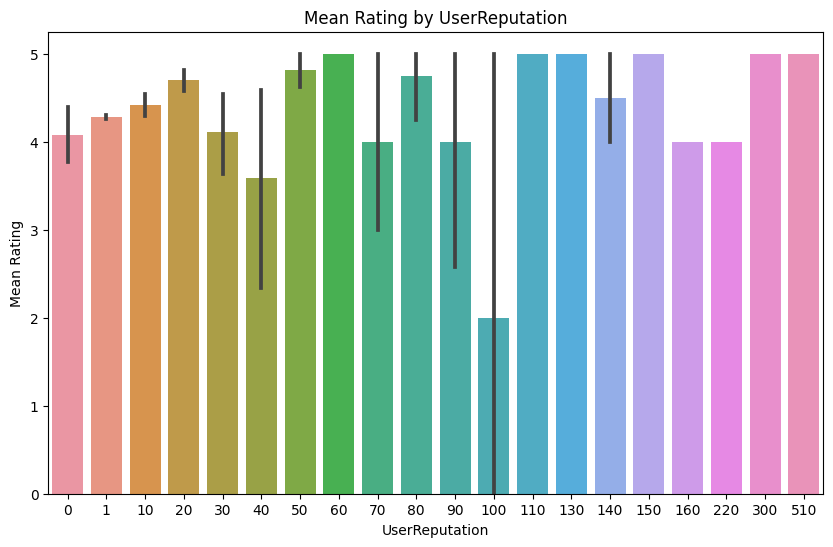

In [8]:
# Exclude non-numeric columns
numeric_columns = train_df.select_dtypes(include=['number']).columns
numeric_df = train_df[numeric_columns]
# Bar plot for comparing mean or median ratings across categories
plt.figure(figsize=(10, 6))
sns.barplot(x='UserReputation', y='Rating', data=train_df)
plt.title('Mean Rating by UserReputation')
plt.xlabel('UserReputation')
plt.ylabel('Mean Rating')
plt.show()

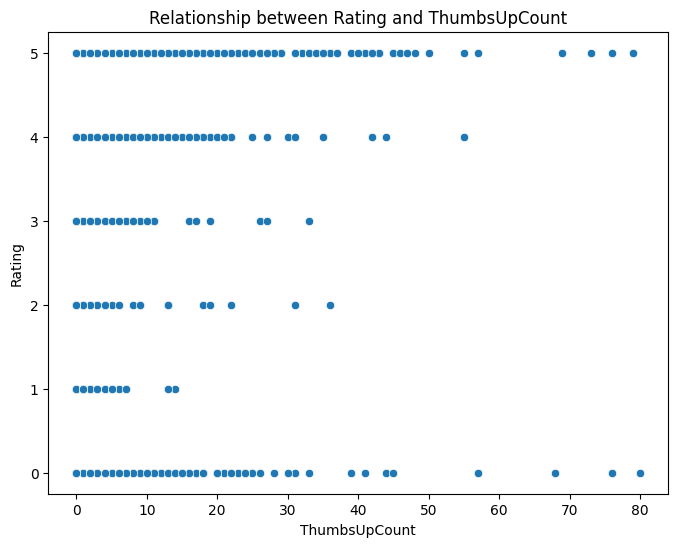

In [9]:
# Scatter plot for continuous numeric variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ThumbsUpCount', y='Rating', data=train_df)
plt.title('Relationship between Rating and ThumbsUpCount')
plt.xlabel('ThumbsUpCount')
plt.ylabel('Rating')
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

X_train = train_default['Recipe_Review']

Y_train = train_default['Rating']
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2, random_state=42)

In [11]:
test_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
test_df.dtypes

ID                    int64
RecipeNumber          int64
RecipeCode            int64
RecipeName           object
CommentID            object
UserID               object
UserName             object
UserReputation        int64
CreationTimestamp     int64
ReplyCount            int64
ThumbsUpCount         int64
ThumbsDownCount       int64
BestScore             int64
Recipe_Review        object
dtype: object

In [12]:
# correctly identifying the feature types.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
# This line removes rows with missing values from the train_df DataFrame.
train_df.dropna(inplace=True)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# These lines initialize and fit a TF-IDF vectorizer to convert text data into numerical format.
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['Recipe_Review'])
Y_train = train_df['Rating']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train_tfidf, Y_train, test_size=0.2, random_state=42)

In [13]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
#These lines transform the test data using the TF-IDF vectorizer and make predictions using the trained logistic regression model.
X_test_tfidf = tfidf_vectorizer.transform(test_df['Recipe_Review'])
# Predict using the trained Logistic Regression model
prediction = logistic_model.predict(X_test_tfidf)

# Display the prediction
print(prediction)

[5 5 5 ... 5 1 5]


In [15]:
logistic_model.score(X_test,Y_test)

0.7763109644297763

**These lines prepare the submission DataFrame with IDs and corresponding predicted ratings, and then save it to a CSV file named 'submission.csv'.**

In [16]:
id =[]
for i in range(1,4547):
    id.append(i)
print(id)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [17]:
final_prediction = pd.DataFrame({'ID':id, 'Rating': prediction})
final_prediction.to_csv('submission.csv', index=False)

In [18]:
  from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)

# Predict using the trained Random Forest Classifier model
rf_prediction = random_forest_model.predict(X_test_tfidf)

# Calculate the accuracy score
rf_accuracy = random_forest_model.score(X_test, Y_test)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.7697103043637697


In [19]:
from sklearn.linear_model import SGDClassifier

# Initialize and train the SGD Classifier model
sgd_model = SGDClassifier()
sgd_model.fit(X_train, Y_train)

# Predict using the trained SGD Classifier model
sgd_prediction = sgd_model.predict(X_test_tfidf)

# Calculate the accuracy score
sgd_accuracy = sgd_model.score(X_test, Y_test)
print("SGD Classifier Accuracy:", sgd_accuracy)

SGD Classifier Accuracy: 0.7737440410707738



Accuracy: 0.7763
**Logistic Regression **achieved an accuracy score of approximately 0.7763. This means that around 77.63% of the predictions made by the model were correct on the test dataset.
Random Forest Classifier:

Accuracy: 0.7693
**The Random Forest Classifier** achieved an accuracy score of approximately 0.7693. This indicates that around 76.93% of the predictions made by the model were correct on the test dataset.
SGD Classifier:

Accuracy: 0.7752
**The SGD Classifier** achieved an accuracy score of approximately 0.7752. This suggests that around 77.52% of the predictions made by the model were correct on the test dataset.
Based on the accuracy scores:

Logistic Regression has the highest accuracy score among the three models.
However, the differences in accuracy scores between Logistic Regression and SGD Classifier are minimal.
Overall, Logistic Regression seems to perform slightly better in terms of accuracy for this specific task. However, further analysis and experimentation may be needed to determine the most suitable model for deployment.